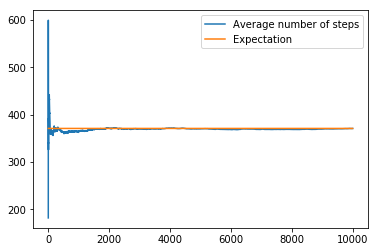

In [2]:
import numpy as np 
from random import *
import matplotlib.pyplot as plt

#distances d1,...,dk
dList = [3,10,5,7,6]
n = sum(dList)
#the expected number of steps until the process terminates
exp = 1/2*(n**2 - np.sum([i**2 for i in dList]))
           
selected = []
countList = []
runs = 10000

for x in range(1,runs+1):
    # parameter count keeps track of the number of steps 
    # until the process terminates 
    count  = 0 
    terminated = False 
    dListCopy = [i for i in dList]
    while (not terminated): 
        count +=1 
        #randomly select a particle
        select = randint(0,len(dListCopy)-1)
        #randomly determine if the particle moves to the left or right
        random = randint(0,1)
        #If the selected particle moves to the right, 
        #the distance on its left increases by one 
        #and the distance on its right decreases by one. 
        #Vice versa for moving to the left.
        if random == 0 : 
            particleInc = (select-1+len(dListCopy))%(len(dListCopy))
            particleDec = (select+len(dListCopy))%(len(dListCopy))
        else: 
            particleDec = (select-1+len(dListCopy))%(len(dListCopy))
            particleInc = (select+len(dListCopy))%(len(dListCopy))               
        dListCopy[particleInc] = dListCopy[particleInc] +1
        dListCopy[particleDec] = dListCopy[particleDec] -1
        
        #If any distance becomes 0, it is eliminated from the run.
        if dListCopy[particleDec] == 0: 
            dListCopy.remove(0)
        #If there becomes only one distance 
        #it means all particles have merged. Terminate
        if (len(dListCopy)==1): 
            terminated = True 
    countList.append(count)
    
#     Print out the average number of steps to reach termination 
#     every 100 experiments. 
#     if (x%100 == 0): 
#         print ("after %d rounds, average : %f" %
#                (x,np.mean(countList)))

numOfRuns=[i for i in range(1,runs+1)]
average=[np.mean(countList[0:i]) for i in range(1,runs+1)]
baseLine=[exp]*runs

%matplotlib inline            
plt.plot(numOfRuns,average)
plt.plot(numOfRuns,baseLine)
plt.legend(['Average number of steps', 'Expectation'], loc='upper right') 